 # Music Recommendation System

# EDA and Preprocessing

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('C:/Users/win10/Desktop/sem 6/AIWIR/a2/songs.csv')
print(f"In this dataframe, there are:\n{df.shape[0]} rows,\n{df.shape[1]} columns")

print("\n","The attributes/features are:")

df.dtypes

In this dataframe, there are:
61921 rows,
7 columns

 The attributes/features are:


user_id         object
song_id         object
listen_count     int64
song            object
artist          object
text            object
link            object
dtype: object

In [55]:
percent_missing = df.isnull().sum() * 100 / len(df)
df.isnull().sum()
print(round(percent_missing,2))

user_id         0.00
song_id         0.00
listen_count    0.00
song            0.10
artist          0.09
text            0.08
link            6.90
dtype: float64


<class 'pandas.core.series.Series'>


Text(0, 0.5, '% missing')

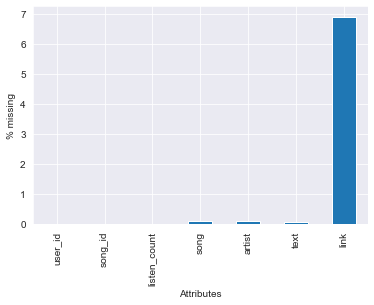

In [56]:
percent_missing = df.isnull().sum() * 100 / len(df)

sns.set_style('darkgrid')
print(type(percent_missing))
percent_missing.plot.bar()
plt.xticks(rotation="vertical")
plt.xlabel("Attributes")
plt.ylabel("% missing")

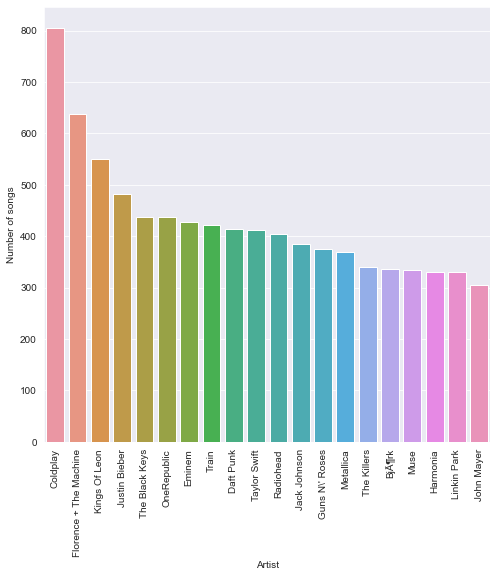

In [57]:
top_song_artist=df['artist'].value_counts()[0:20]
plt.figure(figsize=(8,8))
sns.barplot(data=df,x=top_song_artist.index,y=top_song_artist.values)
plt.xticks(rotation="vertical")
plt.xlabel("Artist")
plt.ylabel("Number of songs")
plt.show()

In [58]:
#Deletion of Unneccessary columns
df.columns

df.drop(columns=['link'],inplace=True)

#After Deleting, the columns are
df.columns

Index(['user_id', 'song_id', 'listen_count', 'song', 'artist', 'text'], dtype='object')

In [59]:
print(df)

                                        user_id             song_id  \
0      b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995   
1      b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBBMDR12A8C13253B   
2      b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBXHDL12A81C204C0   
3      b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBYHAJ12A6701BF1D   
4      b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODACBL12A8C13C273   
...                                         ...                 ...   
61916  8615600e85a175d03f26344d6765a2494f385140  SOHBFUU12A6D4F9DD8   
61917  8615600e85a175d03f26344d6765a2494f385140  SOHHOBM12B0B80823C   
61918  8615600e85a175d03f26344d6765a2494f385140  SOIJUNP12B0B808342   
61919  8615600e85a175d03f26344d6765a2494f385140  SOITOOE12A58A7BD24   
61920  8615600e85a175d03f26344d6765a2494f385140  SOJDSQY12A8AE497C1   

       listen_count                                     song           artist  \
0                 1                                 The Cove     J

In [60]:
percent_missing = df.isnull().sum() * 100 / len(df)
print(round(percent_missing,2))

user_id         0.00
song_id         0.00
listen_count    0.00
song            0.10
artist          0.09
text            0.08
dtype: float64


In [61]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61921 entries, 0 to 61920
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       61921 non-null  object
 1   song_id       61921 non-null  object
 2   listen_count  61921 non-null  int64 
 3   song          61860 non-null  object
 4   artist        61863 non-null  object
 5   text          61874 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.8+ MB


# Content-based filters

### Importing required libraries

First, we'll import all the required libraries.

In [1]:
import numpy as np
import pandas as pd

In [2]:
from typing import List, Dict

We have already used the **TF-IDF score before** when performing Twitter sentiment analysis. 

Likewise, we are going to use TfidfVectorizer from the Scikit-learn package again.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Dataset

So imagine that we have the [following dataset](https://www.kaggle.com/mousehead/songlyrics/data#). 

This dataset contains name, artist, and lyrics for *57650 songs in English*. The data has been acquired from LyricsFreak through scraping.

In [4]:
songs = pd.read_csv('C:/Users/win10/Desktop/sem 6/AIWIR/a2/songs.csv')

In [7]:
songs.head()

,user_id,song_id,listen_count,song,artist,text
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Jack Johnson,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Kanye West,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters,Learn To Fly - Foo Fighters


Because of the dataset being so big, we are going to resample only 5000 random songs.

We can notice also the presence of `\n` in the text, so we are going to remove it.

In [12]:
songs['text'] = songs['text'].str.replace(r'\n', '')

C:\Users\win10\AppData\Local\Temp\ipykernel_13860\269676193.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  songs['text'] = songs['text'].str.replace(r'\n', '')


After that, we use TF-IDF vectorizerthat calculates the TF-IDF score for each song lyric, word-by-word. 

Here, we pay particular attention to the arguments we can specify.

In [13]:
tfidf = TfidfVectorizer(analyzer='word', stop_words='english')

In [14]:
songs=songs.iloc[0:10000,]
songs.shape

(10000, 6)

In [15]:
lyrics_matrix = tfidf.fit_transform(songs['text'])

*How do we use this matrix for a recommendation?* 

We now need to calculate the similarity of one lyric to another. We are going to use **cosine similarity**.

We want to calculate the cosine similarity of each item with every other item in the dataset. So we just pass the lyrics_matrix as argument.

In [16]:
cosine_similarities = cosine_similarity(lyrics_matrix) 

Once we get the similarities, we'll store in a dictionary the names of the 50  most similar songs for each song in our dataset.

In [17]:
similarities = {}

In [18]:
for i in range(len(cosine_similarities)):
    # Now we'll sort each element in cosine_similarities and get the indexes of the songs. 
    similar_indices = cosine_similarities[i].argsort()[:-50:-1] 
    # After that, we'll store in similarities each name of the 50 most similar songs.
    # Except the first one that is the same song.
    similarities[songs['song'].iloc[i]] = [(cosine_similarities[i][x], songs['song'][x], songs['artist'][x]) for x in similar_indices][1:]

After that, all the magic happens. We can use that similarity scores to access the most similar items and give a recommendation.

For that, we'll define our Content based recommender class.

In [19]:
class ContentBasedRecommender:
    def __init__(self, matrix):
        self.matrix_similar = matrix

    def _print_message(self, song, recom_song):
        rec_items = len(recom_song)
        
        print(f'The {rec_items} recommended songs for {song} are:')
        for i in range(rec_items):
            print(f"Number {i+1}:")
            print(f"{recom_song[i][1]} by {recom_song[i][2]} with {round(recom_song[i][0], 3)} similarity score") 
            print("--------------------")
        
    def recommend(self, recommendation):
        # Get song to find recommendations for
        song = recommendation['song']
        # Get number of songs to recommend
        number_songs = recommendation['number_songs']
        # Get the number of songs most similars from matrix similarities
        recom_song = self.matrix_similar[song][:number_songs]
        # print each item
        self._print_message(song=song, recom_song=recom_song)

Now, instantiate class

In [20]:
recommedations = ContentBasedRecommender(similarities)

Then, we are ready to pick a song from the dataset and make a recommendation.

In [21]:
recommendation = {
    "song": songs['song'].iloc[10],
    "number_songs": 4 
}

In [22]:
recommedations.recommend(recommendation)

The 4 recommended songs for Let It Be Sung are:
Number 1:
Lullaby by Jack Johnson / Matt Costa with 0.446 similarity score
--------------------
Number 2:
Sunshine by Matt Costa with 0.344 similarity score
--------------------
Number 3:
If I Could by Jack Johnson with 0.305 similarity score
--------------------
Number 4:
If I Could by Jack Johnson with 0.305 similarity score
--------------------


And we can pick another random song and recommend again:

In [17]:
recommendation2 = {
    "song": songs['song'].iloc[120],
    "number_songs": 4 
}

In [18]:
recommedations.recommend(recommendation2)

The 4 recommended songs for Suffragette City are:
Number 1:
Say You Will by Kanye West with 0.259 similarity score
--------------------
Number 2:
You Just Don't Care by Santana with 0.21 similarity score
--------------------
Number 3:
Who Do You Love by Def Leppard with 0.209 similarity score
--------------------
Number 4:
You Might Need A Man by John Martyn with 0.207 similarity score
--------------------


# MODEL BASED COLLABARATIVE FILTERING 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df=pd.read_csv('C:/Users/win10/Desktop/sem 6/AIWIR/a2/songs.csv')

In [25]:
df.head()

,user_id,song_id,listen_count,song,artist,text,link
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Jack Johnson,The Cove - Jack Johnson,/a/abba/ahes+my+kind+of+girl_20598417.html
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia,Entre Dos Aguas - Paco De Lucia,/a/abba/andante+andante_20002708.html
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Kanye West,Stronger - Kanye West,/a/abba/as+good+as+new_20003033.html
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson,Constellations - Jack Johnson,/a/abba/bang_20598415.html
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters,Learn To Fly - Foo Fighters,/a/abba/bang+a+boomerang_20002668.html


In [26]:
df['song'].value_counts()

Sehr kosmisch                     331
Undo                              300
You\'re The One                   272
Dog Days Are Over (Radio Edit)    259
Revelry                           239
                                 ... 
Sleeping In The Ground              1
Slan Le Maige                       1
Bruised (Snakes Remix)              1
The Heart Of Everything             1
The Sharing Song                    1
Name: song, Length: 9143, dtype: int64

In [27]:
len(df)

61921

In [28]:
users = df['user_id'].unique()

In [29]:
len(users)

3685

In [31]:
song=df.drop_duplicates(['user_id','song','artist','text'])
song=song.reset_index(drop=True)

In [32]:
song.head()

,user_id,song_id,listen_count,song,artist,text,link
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Jack Johnson,The Cove - Jack Johnson,/a/abba/ahes+my+kind+of+girl_20598417.html
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia,Entre Dos Aguas - Paco De Lucia,/a/abba/andante+andante_20002708.html
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Kanye West,Stronger - Kanye West,/a/abba/as+good+as+new_20003033.html
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson,Constellations - Jack Johnson,/a/abba/bang_20598415.html
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters,Learn To Fly - Foo Fighters,/a/abba/bang+a+boomerang_20002668.html


In [33]:
#Deletion of Unneccessary columns
song.columns

song.drop(columns=['link'],inplace=True)

#After Deleting, the columns are
song.columns

Index(['user_id', 'song_id', 'listen_count', 'song', 'artist', 'text'], dtype='object')

In [34]:
song.head()

,user_id,song_id,listen_count,song,artist,text
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Jack Johnson,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Kanye West,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters,Learn To Fly - Foo Fighters


In [36]:
song_pivot=song.pivot(index='user_id',columns='song_id',values='listen_count')

In [37]:
song_pivot.shape

(3685, 9546)

In [38]:
song_pivot=song_pivot.fillna(0)

In [39]:
song_pivot[song_pivot.SOBYHAJ12A6701BF1D==1]

song_id,SOAAAGQ12A8C1420C8,SOAACPJ12A81C21360,SOAACSG12AB018DC80,SOAAEJI12AB0188AB5,SOAAFAC12A67ADF7EB,SOAAFYH12A8C13717A,SOAAJMQ12A6D4F7D17,SOAAKPM12A58A77210,SOAALWN12A6D4F7FDA,SOAAMOW12AB018149B,...,SOZZIOH12A67ADE300,SOZZKPR12A6D4F8147,SOZZLZN12A8AE48D6D,SOZZRHE12A6702165F,SOZZTCU12AB0182C58,SOZZTNF12A8C139916,SOZZVWB12AB0189C30,SOZZWZV12A67AE140F,SOZZYAO12A6701FF36,SOZZZPV12A8C1444B5
user_id,,,,,,,,,,,,,,,,,,,,,
1645b689f873529ab85e3b72742be44813e82bd3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2a8a8f48fd4eb5ca4b64874162df4fdf584d89c4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33280fc74b168e2667a2da5c6ab4df4cc6edfb23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
572da9d6331782b8c48924968f0778a331170c20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6f8453b0d9d2199f98c1992995a8445ad6837fd8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7a4b8e7d2905d13422418b4f48cc85100892e013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7ff09036b3ba258b13621875d18d43511ed2e09c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8d0bd6922dc3d0379444207a5ae3c02943dd5fc6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b2cbcf5ea3c6ea3ee41ceac0ef247c2b1ddedbdc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
from sklearn.neighbors import NearestNeighbors
knn=NearestNeighbors(n_neighbors=10,metric='cosine')
Model=knn.fit(song_pivot)

In [41]:
song_pivot[song_pivot.index == 1]

song_id,SOAAAGQ12A8C1420C8,SOAACPJ12A81C21360,SOAACSG12AB018DC80,SOAAEJI12AB0188AB5,SOAAFAC12A67ADF7EB,SOAAFYH12A8C13717A,SOAAJMQ12A6D4F7D17,SOAAKPM12A58A77210,SOAALWN12A6D4F7FDA,SOAAMOW12AB018149B,...,SOZZIOH12A67ADE300,SOZZKPR12A6D4F8147,SOZZLZN12A8AE48D6D,SOZZRHE12A6702165F,SOZZTCU12AB0182C58,SOZZTNF12A8C139916,SOZZVWB12AB0189C30,SOZZWZV12A67AE140F,SOZZYAO12A6701FF36,SOZZZPV12A8C1444B5
user_id,,,,,,,,,,,,,,,,,,,,,


In [42]:
user = song_pivot.iloc[1,]

In [43]:
distances, indices = Model.kneighbors([user])
distances, indices

C:\Users\win10\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


(array([[0.        , 0.71428571, 0.72196466, 0.73917973, 0.75658779,
         0.77757173, 0.81488636, 0.85245778, 0.85857864, 0.86516003]]),
 array([[   1, 2415, 3604, 3415,  636, 1106, 3178,  250, 2065,   50]],
       dtype=int64))

In [44]:
neighbors=[]
for item in indices[0][1:]:
    neighbors.append(song[song.index == item].user_id.values[0])
neighbors

['2e37aa820994c7e8465721a6a6ee78f48fc4df7a',
 '497f5a58ffeaa953d619e95ca5b8736e74b99127',
 '53659e6ae51d163d5de5709c53707df87a669cfb',
 'e6b4dbf8e48346fbfd233fa96cdf5daee25ae77c',
 '956044d724390e40c8511b49e5bf6bc28071de3a',
 '4208d4ac45e7caab7167a4ea6d34e759a6b9a1fc',
 '405d396ea64d75b5eaefaaf8ac836f45fa56af4d',
 'dfb41c400ed8fbb064644d173f8fd00398ca4370',
 'bd4c6e843f00bd476847fb75c47b4fb430a06856']

In [46]:
neighbor_songs=pd.DataFrame(columns=['user_id','song_id','listen_count','song','artist','text'])
for item in neighbors:
    neighbor_songs=neighbor_songs.append(song[song.user_id == item],ignore_index = True)
neighbor_songs

C:\Users\win10\AppData\Local\Temp\ipykernel_13860\3284780794.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neighbor_songs=neighbor_songs.append(song[song.user_id == item],ignore_index = True)


,user_id,song_id,listen_count,song,artist,text
0,2e37aa820994c7e8465721a6a6ee78f48fc4df7a,SOBJDDA12A6BD53159,5,Long Black Road,Slim Dusty,Long Black Road - Slim Dusty
1,2e37aa820994c7e8465721a6a6ee78f48fc4df7a,SOBNTMC12A6D4FA422,2,Back To School (Mini Maggit) (LP Version),Deftones,Back To School (Mini Maggit) (LP Version) - De...
2,2e37aa820994c7e8465721a6a6ee78f48fc4df7a,SOCWIWP12AB018D16D,3,New Noise,Refused,New Noise - Refused
3,2e37aa820994c7e8465721a6a6ee78f48fc4df7a,SOEVGQZ12A6D4FC5B2,2,Search And Destroy,Red Hot Chili Peppers / Beavis And Butt-Head,Search And Destroy - Red Hot Chili Peppers / B...
4,2e37aa820994c7e8465721a6a6ee78f48fc4df7a,SOJVIXA12AF72A5752,1,Inolvidable,Reik,Inolvidable - Reik
...,...,...,...,...,...,...
175,bd4c6e843f00bd476847fb75c47b4fb430a06856,SOHRQZQ12A6D4F81D2,1,Auto Rock,Mogwai,Auto Rock - Mogwai
176,bd4c6e843f00bd476847fb75c47b4fb430a06856,SOJGMYY12AB01809BE,2,Who Knows Who Cares,Local Natives,Who Knows Who Cares - Local Natives
177,bd4c6e843f00bd476847fb75c47b4fb430a06856,SOQFEDG12AB018DD24,1,Girlfriend,Phoenix,Girlfriend - Phoenix
178,bd4c6e843f00bd476847fb75c47b4fb430a06856,SOVRZIX12AAF3B2A32,1,Armistice,Phoenix,Armistice - Phoenix


In [47]:
neighbor_songs=pd.DataFrame({'Count':neighbor_songs['listen_count'],'Song':neighbor_songs['text']})

In [49]:
df['text']

0                               The Cove - Jack Johnson
1                       Entre Dos Aguas - Paco De Lucia
2                                 Stronger - Kanye West
3                         Constellations - Jack Johnson
4                           Learn To Fly - Foo Fighters
                              ...                      
61916                    Once In A Lifetime - Wolfsheim
61917                 Skip To The End - The Futureheads
61918    Stephanie Knows Who (LP/Stereo Version) - Love
61919                  Batdance ( LP Version ) - Prince
61920              Pleasant Valley Sunday - The Monkees
Name: text, Length: 61921, dtype: object

In [50]:
df.describe(include= 'all')

,user_id,song_id,listen_count,song,artist,text,link
count,61921,61921,61921.000000,61860,61863,61874,57650
unique,3685,9547,NaN,9143,3288,9503,57650
top,2a32c479648c33b642c4d8a89488ab8362d7c18b,SOFRQTD12A81C233C0,NaN,Sehr kosmisch,Coldplay,Sehr kosmisch - Harmonia,/a/abba/ahes+my+kind+of+girl_20598417.html
freq,49,331,NaN,331,806,331,1
mean,NaN,NaN,3.250093,NaN,NaN,NaN,NaN
std,NaN,NaN,7.993526,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,3.000000,NaN,NaN,NaN,NaN


In [51]:
neighbor_songs=neighbor_songs.sort_values('Count',ascending=False)
neighbor_songs

,Count,Song
129,66,Numb (Album Version) - Disturbed
111,56,Now You\'re Gone - Basshunter Feat. DJ Mental ...
121,34,Night Village - Deep Forest
106,30,Walk On Water - Basshunter
101,30,Ghosts \'n\' Stuff (Original Instrumental Mix)...
...,...,...
91,1,Creepin Up The Backstairs - The Fratellis
89,1,All This Beauty - The Weepies
88,1,Baby Fratelli - The Fratellis
87,1,The Downfall Of Us All - A Day To Remember


In [52]:
neighbor_songs=neighbor_songs.reset_index(drop=True)
neighbor_songs

,Count,Song
0,66,Numb (Album Version) - Disturbed
1,56,Now You\'re Gone - Basshunter Feat. DJ Mental ...
2,34,Night Village - Deep Forest
3,30,Walk On Water - Basshunter
4,30,Ghosts \'n\' Stuff (Original Instrumental Mix)...
...,...,...
175,1,Creepin Up The Backstairs - The Fratellis
176,1,All This Beauty - The Weepies
177,1,Baby Fratelli - The Fratellis
178,1,The Downfall Of Us All - A Day To Remember


In [53]:
Recommended_Song=neighbor_songs['Song'][0:10]
print(Recommended_Song)

0                     Numb (Album Version) - Disturbed
1    Now You\'re Gone - Basshunter Feat. DJ Mental ...
2                          Night Village - Deep Forest
3                           Walk On Water - Basshunter
4    Ghosts \'n\' Stuff (Original Instrumental Mix)...
5         Sorrow (1997 Digital Remaster) - David Bowie
6                            Canada - Five Iron Frenzy
7    Otherside (Album Version) - Red Hot Chili Peppers
8                            Hotel California - Eagles
9       Roulette Dares (The Haunt Of) - The Mars Volta
Name: Song, dtype: object
